# Multiple Linear Regression
## Housing Case Study

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

Essentially, the company wants —
- To Identify Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

#### Business Goals:

We need to build model to  demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

**So interpretation is important!**!**

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1824]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [1825]:
# # Recommended versions
# numpy 	1.26.4
# pandas	2.2.2
# matplotlib	3.7.1
# seaborn	0.10.0
# statsmodels	0.14.4
# sklearn	1.5.2

In [1826]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

In [1827]:
biking = pd.read_csv("day.csv")

In [1828]:
# check the head of dataset 
biking.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [1829]:
# check the various aspect of dataset 
#1.
biking.shape

(730, 16)

In [1830]:
#2.- Check if any columns have null values 
biking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1831]:
#2.a- Check if any columns have null values 
biking.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [1832]:
# renaming few columns for better readibility

biking.rename(columns={'dteday':'date','yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace=True)

In [1833]:
#2.- Check mean, med, avg values  
biking.head()

instant        date  season  year  month  holiday  weekday  workingday  \
0        1  01-01-2018       1     0      1        0        6           0   
1        2  02-01-2018       1     0      1        0        0           0   
2        3  03-01-2018       1     0      1        0        1           1   
3        4  04-01-2018       1     0      1        0        2           1   
4        5  05-01-2018       1     0      1        0        3           1   

   weathersit       temp     atemp  humidity  windspeed  casual  registered  \
0           2  14.110847  18.18125   80.5833  10.749882     331         654   
1           2  14.902598  17.68695   69.6087  16.652113     131         670   
2           1   8.050924   9.47025   43.7273  16.636703     120        1229   
3           1   8.200000  10.60610   59.0435  10.739832     108        1454   
4           1   9.305237  11.46350   43.6957  12.522300      82        1518   

   count  
0    985  
1    801  
2   1349  
3   1562  
4   1600

In [1834]:
biking.shape

(730, 16)

## Step 2: Visualising the Data & Data Cleanup

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [1836]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

<Figure size 2000x1200 with 0 Axes>

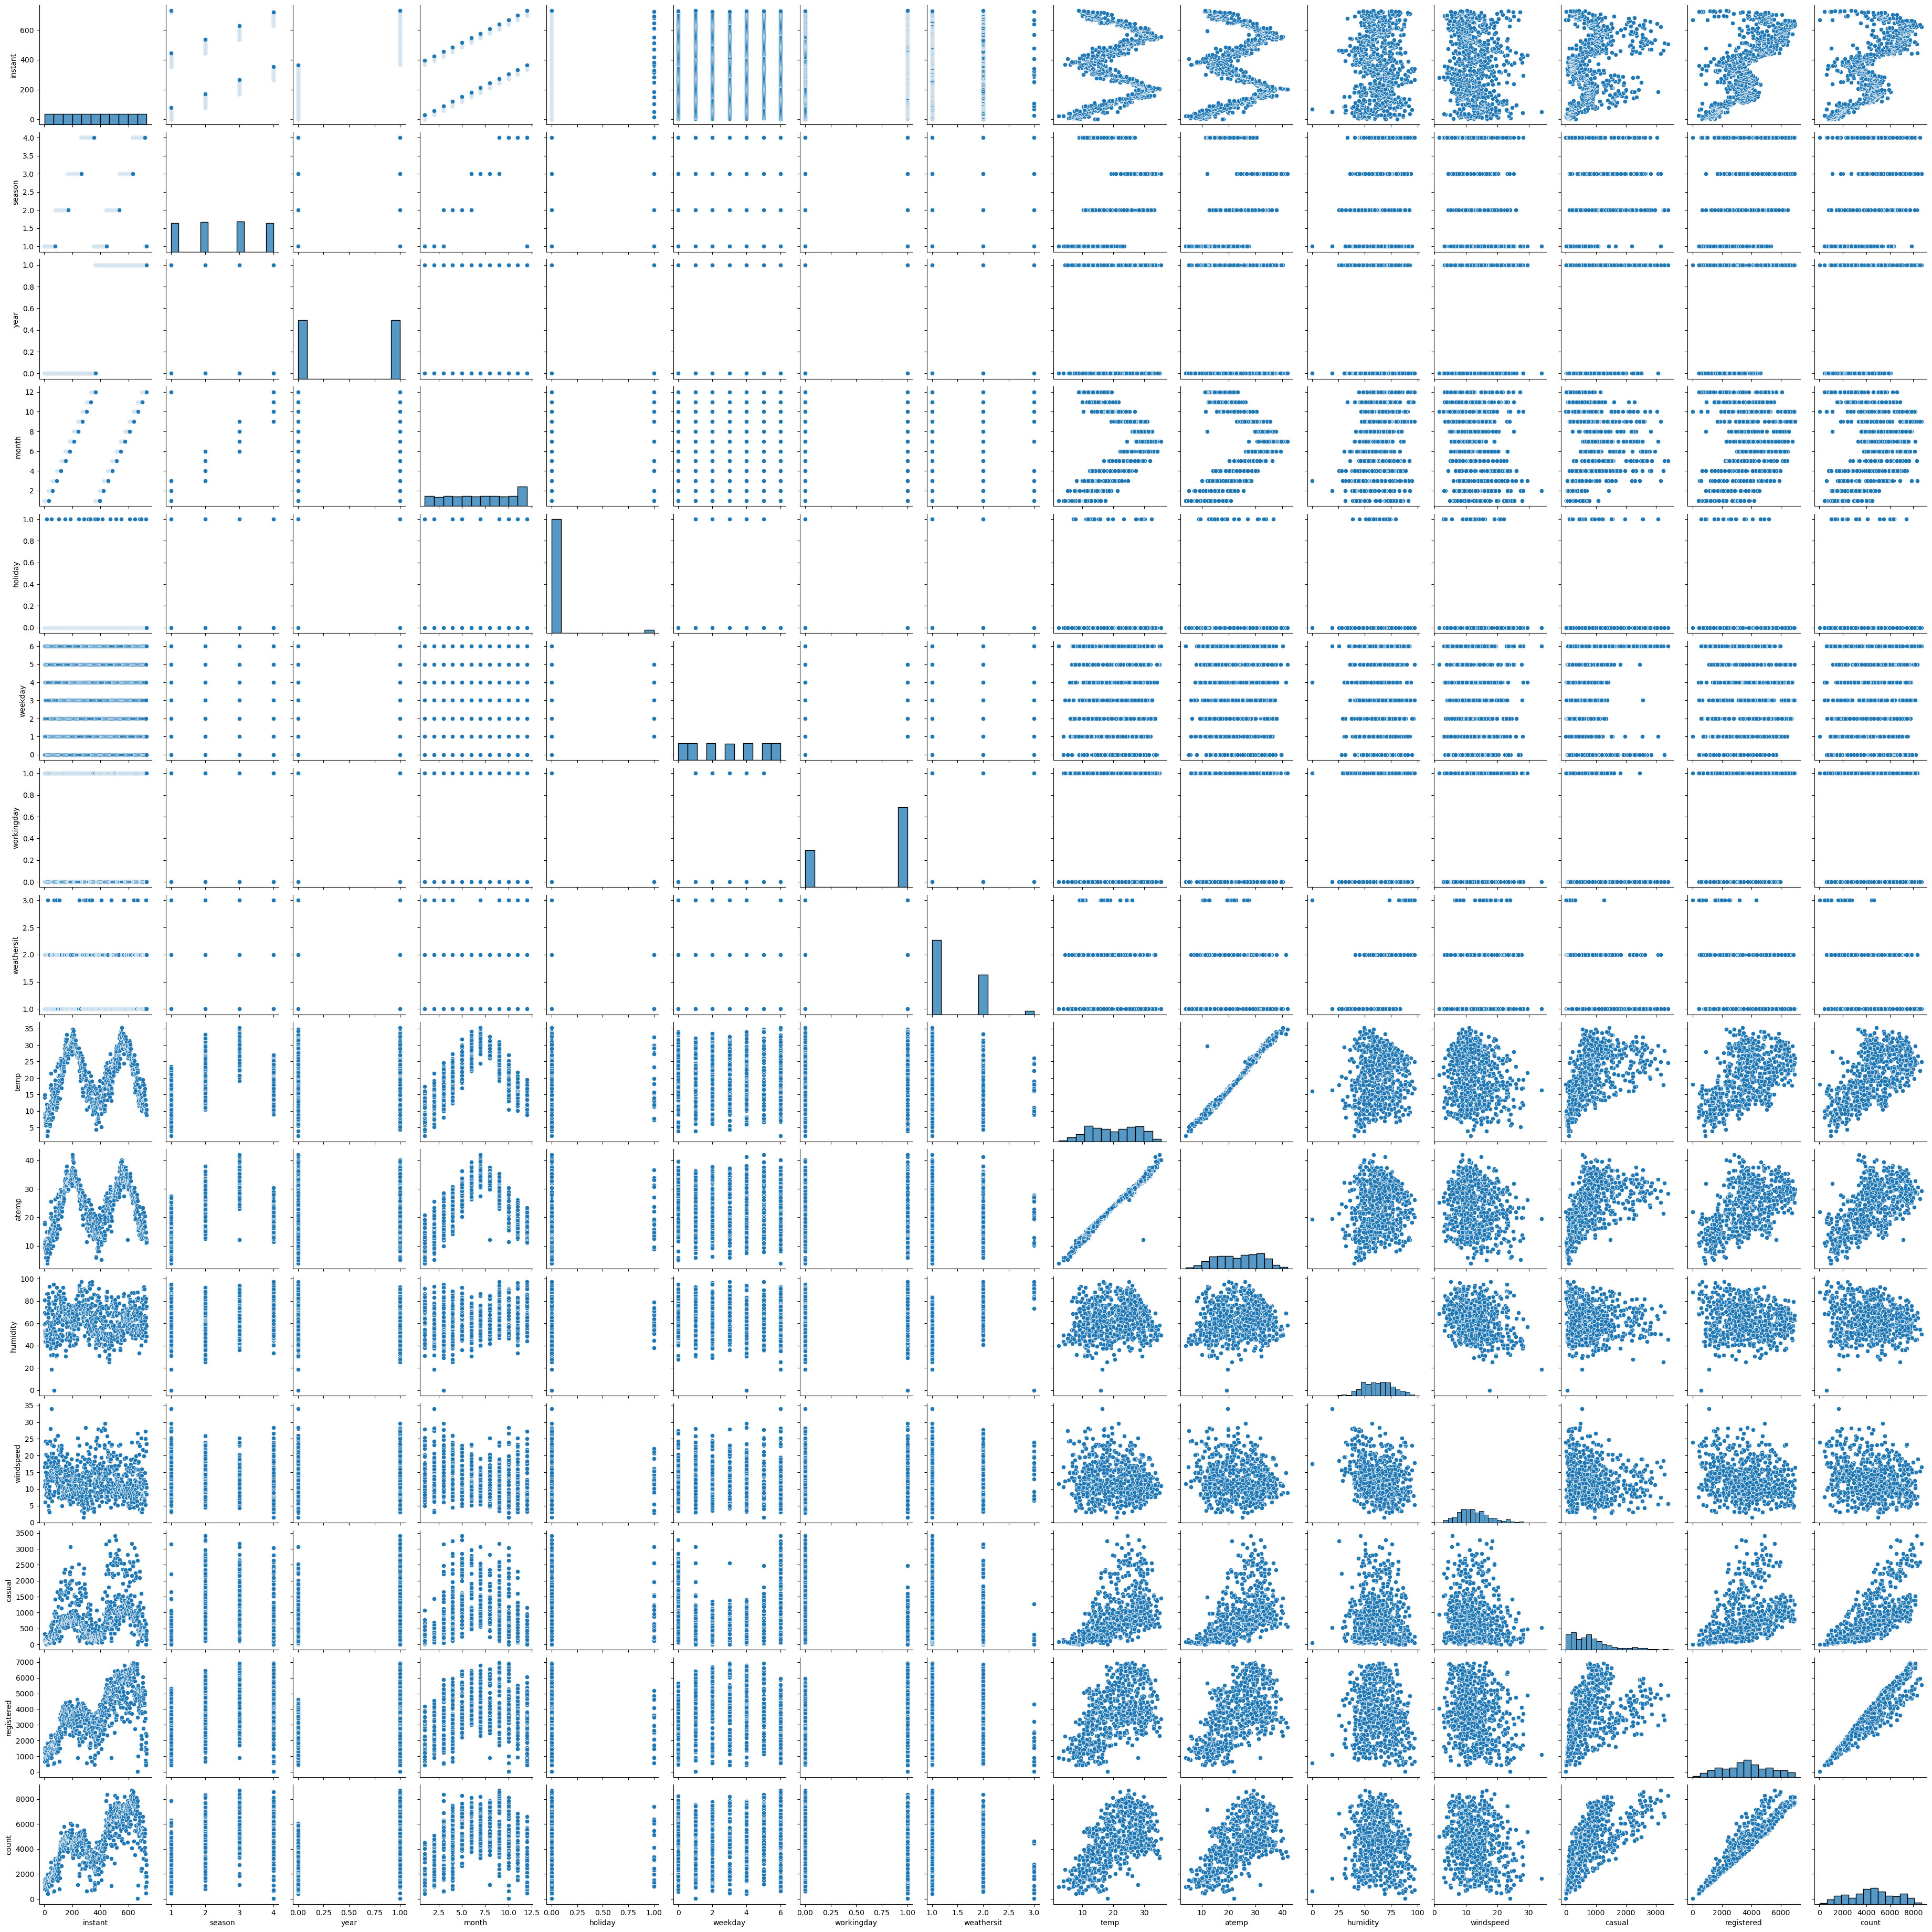

In [1838]:
plt.figure(figsize=(20, 12))
sns.pairplot(biking)
plt.show()

<Figure size 5000x5000 with 0 Axes>

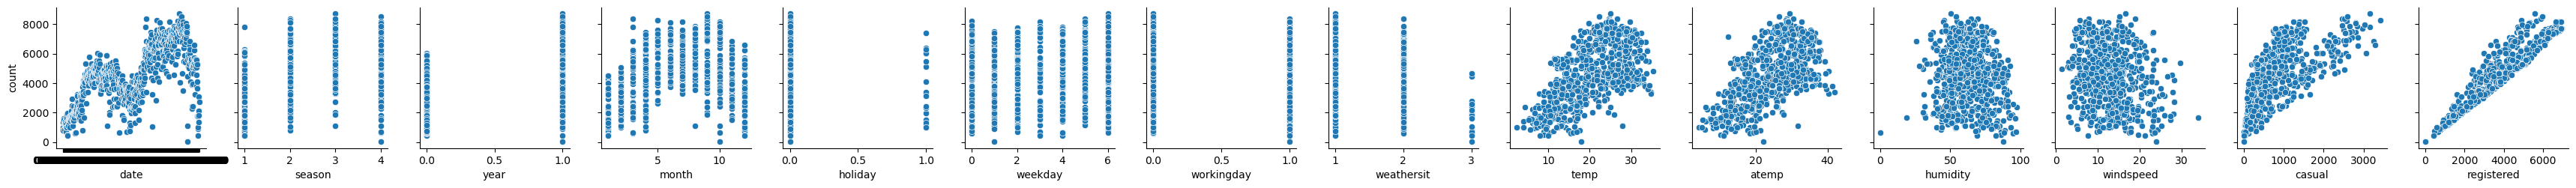

In [1839]:
# seaborn library has other way to compare and  visiulize the scatter data using pairplot method for all varaibles
plt.figure(figsize=(50, 50))
sns.pairplot(x_vars=['date' ,'season','year' ,'month','holiday','weekday','workingday','weathersit','temp' ,'atemp','humidity','windspeed','casual','registered'], y_vars='count', data = biking)
plt.show()

In [1840]:
# finding out the columns which can be dropped - 
#Based on paiplot - impt columns - date, temp, feeltemp, humdity, windspeed, casual, registered
# instant - its index column so we can drop.
# date can be dropped as we have year and month column,
# casual and registered seems to be the breakup by category for cnt column.

biking.drop(['instant','date','casual','registered'],axis=1,inplace=True)

In [1841]:
#check for datatypes
biking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   year        730 non-null    int64  
 2   month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [1842]:
biking.head()

season  year  month  holiday  weekday  workingday  weathersit       temp  \
0       1     0      1        0        6           0           2  14.110847   
1       1     0      1        0        0           0           2  14.902598   
2       1     0      1        0        1           1           1   8.050924   
3       1     0      1        0        2           1           1   8.200000   
4       1     0      1        0        3           1           1   9.305237   

      atemp  humidity  windspeed  count  
0  18.18125   80.5833  10.749882    985  
1  17.68695   69.6087  16.652113    801  
2   9.47025   43.7273  16.636703   1349  
3  10.60610   59.0435  10.739832   1562  
4  11.46350   43.6957  12.522300   1600

In [1843]:
#from dataset we can see that: season,	year,	month,	holiday,	weekday,	workingday,	weathertype, it all are categorical variables
#We will replace season,weekday and weathersit with appropriate values
#1. Upodating Season 
biking['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
#2. Updating Month 
biking['month'].replace({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'},inplace=True)
#3. Updating Weekday 
biking['weekday'].replace({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'},inplace=True)
#4. Updating weathersit 
biking['weathersit'].replace({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'},inplace=True)

# check the dataset now
biking.head(20)

season  year month  holiday weekday  workingday weathersit       temp  \
0   spring     0   jan        0     sat           0      Misty  14.110847   
1   spring     0   jan        0     sun           0      Misty  14.902598   
2   spring     0   jan        0     mon           1      Clear   8.050924   
3   spring     0   jan        0     tue           1      Clear   8.200000   
4   spring     0   jan        0     wed           1      Clear   9.305237   
5   spring     0   jan        0     thu           1      Clear   8.378268   
6   spring     0   jan        0     fri           1      Misty   8.057402   
7   spring     0   jan        0     sat           0      Misty   6.765000   
8   spring     0   jan        0     sun           0      Clear   5.671653   
9   spring     0   jan        0     mon           1      Clear   6.184153   
10  spring     0   jan        0     tue           1      Misty   6.932731   
11  spring     0   jan        0     wed           1      Clear   7.081807   
12  spring     0   jan        0     thu           1      Clear   6.765000   
13  spring     0   jan        0     fri           1      Clear   6.595670   
14  spring     0   jan        0     sat           0      Misty   9.566653   
15  spring     0   jan        0     sun           0      Clear   9.498347   
16  spring     0   jan        1     mon           0      Misty   7.209153   
17  spring     0   jan        0     tue           1      Misty   8.883347   
18  spring     0   jan        0     wed           1      Misty  11.979134   
19  spring     0   jan        0     thu           1      Misty  10.728347   

       atemp  humidity  windspeed  count  
0   18.18125   80.5833  10.749882    985  
1   17.68695   69.6087  16.652113    801  
2    9.47025   43.7273  16.636703   1349  
3   10.60610   59.0435  10.739832   1562  
4   11.46350   43.6957  12.522300   1600  
5   11.66045   51.8261   6.000868   1606  
6   10.44195   49.8696  11.304642   1510  
7    8.11270   53.5833  17.875868    959  
8    5.80875   43.4167  24.250650    822  
9    7.54440   48.2917  14.958889   1321  
10   9.57320   68.6364   8.182844   1263  
11   8.02365   59.9545  20.410009   1162  
12   7.54415   47.0417  20.167000   1406  
13   9.42065   53.7826   8.478716   1421  
14  12.40560   49.8750  10.583521   1248  
15  11.71085   48.3750  12.625011   1204  
16   8.83855   53.7500  12.999139   1000  
17  11.61665   86.1667   9.833925    683  
18  14.92110   74.1739  13.957239   1650  
19  12.75250   53.8333  13.125568   1927

In [1844]:
biking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Variables Classification:
  #### Catagorical variables - 
        # season : season (1:spring, 2:summer, 3:fall, 4:winter)
        # month : month ( 1 to 12)
        # weekday
        # weathersit (1: Clear,2: Mist,3: Light,4: Heavy)

  #### Catagorical variables But in 0/1  - 
        # year (0: 2018, 1:2019)
        # holiday (0/1)
        # working day (0/1)
  #### Numerical variables -  
        # temp : temperature in Celsius
        # atemp: feeling temperature in Celsius
        # humidity
        # windspeed:wind speed
        # count:count of total rental bikes including both casual and registeredered

In [1846]:
# Analysise the catagorical variables.
# draw bar plots with each predictor varaible and target varaiable (#Count)

#Method: draw bar plot using Seaborn
    # df: DataFrame containing the data
    # x: Column name for the x-axis
    # y: Column name for the y-axis
    # hue: (Optional) Column name for subcategories.
    # ax: Subplot axis object for positioning the plot
    # title: Title of the subplot (default: "Bar Plot")
  
  #Returns:
     # Displays the bar plot within the subplot
def draw_barplot(df, x, y, hue=None, ax=None, title="Bar Plot"):
    sns.barplot(data=df, x=x, y=y, hue=hue, ax=ax, ci=None)  # ci=None removes confidence interval shading
    ax.set_title(title)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.tick_params(axis='x', rotation=45)
    
    if hue:
        ax.legend(title=hue)

    return ax


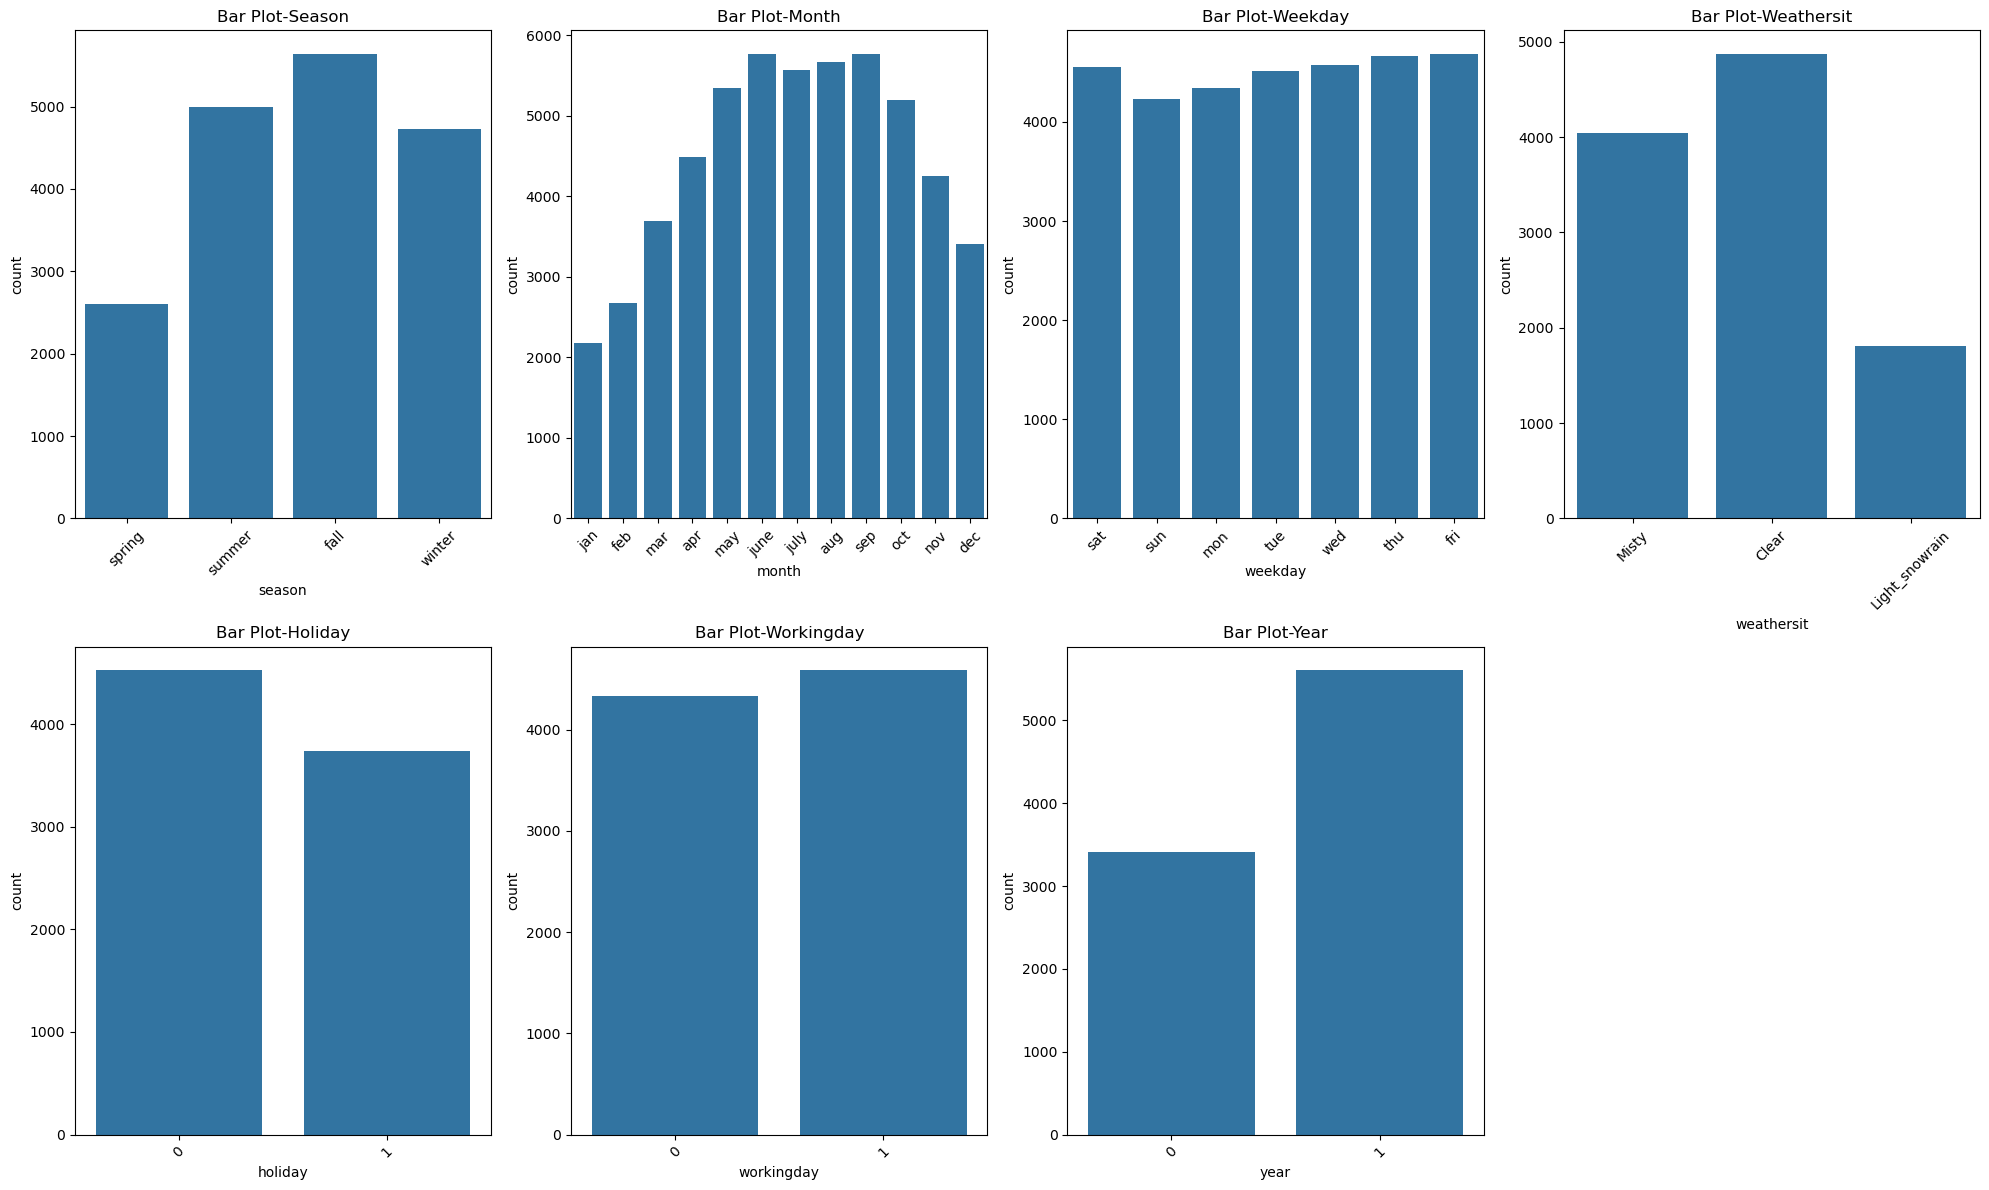

In [1847]:
#1.# Analysise the catagorical variables without subcatagory(year:2018/2019)
plt.figure(figsize=(20, 12))

axes = plt.subplot(2,4,1)
draw_barplot(biking, x = 'season', y = 'count', ax=axes, title="Bar Plot-Season" )
axes = plt.subplot(2,4,2)
draw_barplot(biking, x = 'month', y = 'count', ax=axes, title="Bar Plot-Month" )
axes = plt.subplot(2,4,3)
draw_barplot(biking, x = 'weekday', y = 'count',ax=axes, title="Bar Plot-Weekday" )
axes = plt.subplot(2,4,4)
draw_barplot(biking, x = 'weathersit', y = 'count',ax=axes, title="Bar Plot-Weathersit" )
axes = plt.subplot(2,4,5)
draw_barplot(biking, x = 'holiday', y = 'count', ax=axes, title="Bar Plot-Holiday" )
axes = plt.subplot(2,4,6)
draw_barplot(biking, x = 'workingday', y = 'count',ax=axes, title="Bar Plot-Workingday" )
axes = plt.subplot(2,4,7)
draw_barplot(biking, x = 'year', y = 'count',ax=axes, title="Bar Plot-Year" )


# Show the plots
plt.tight_layout()
plt.show()

In [1848]:
### 1:Analysis on bar plot :
 # season: Fall season attracted more booking follwed by summer and winter. 
 # month: Most of the bookings has been done during the month of may, june, july, aug, sep and oct.winter season have low bookings.
 # weekday: Thursday, firday, saturday have more booking as compare to other weekdays.
 # weathersit: clear wether attracted more booking.
 # holiday: When its not holiday, booking seems to be less in number which seems reasonable as on holidays.
 # workingday:working day hav emore booking but not much difference if its weekend or not .
 # year:2019 have increased overall booking .

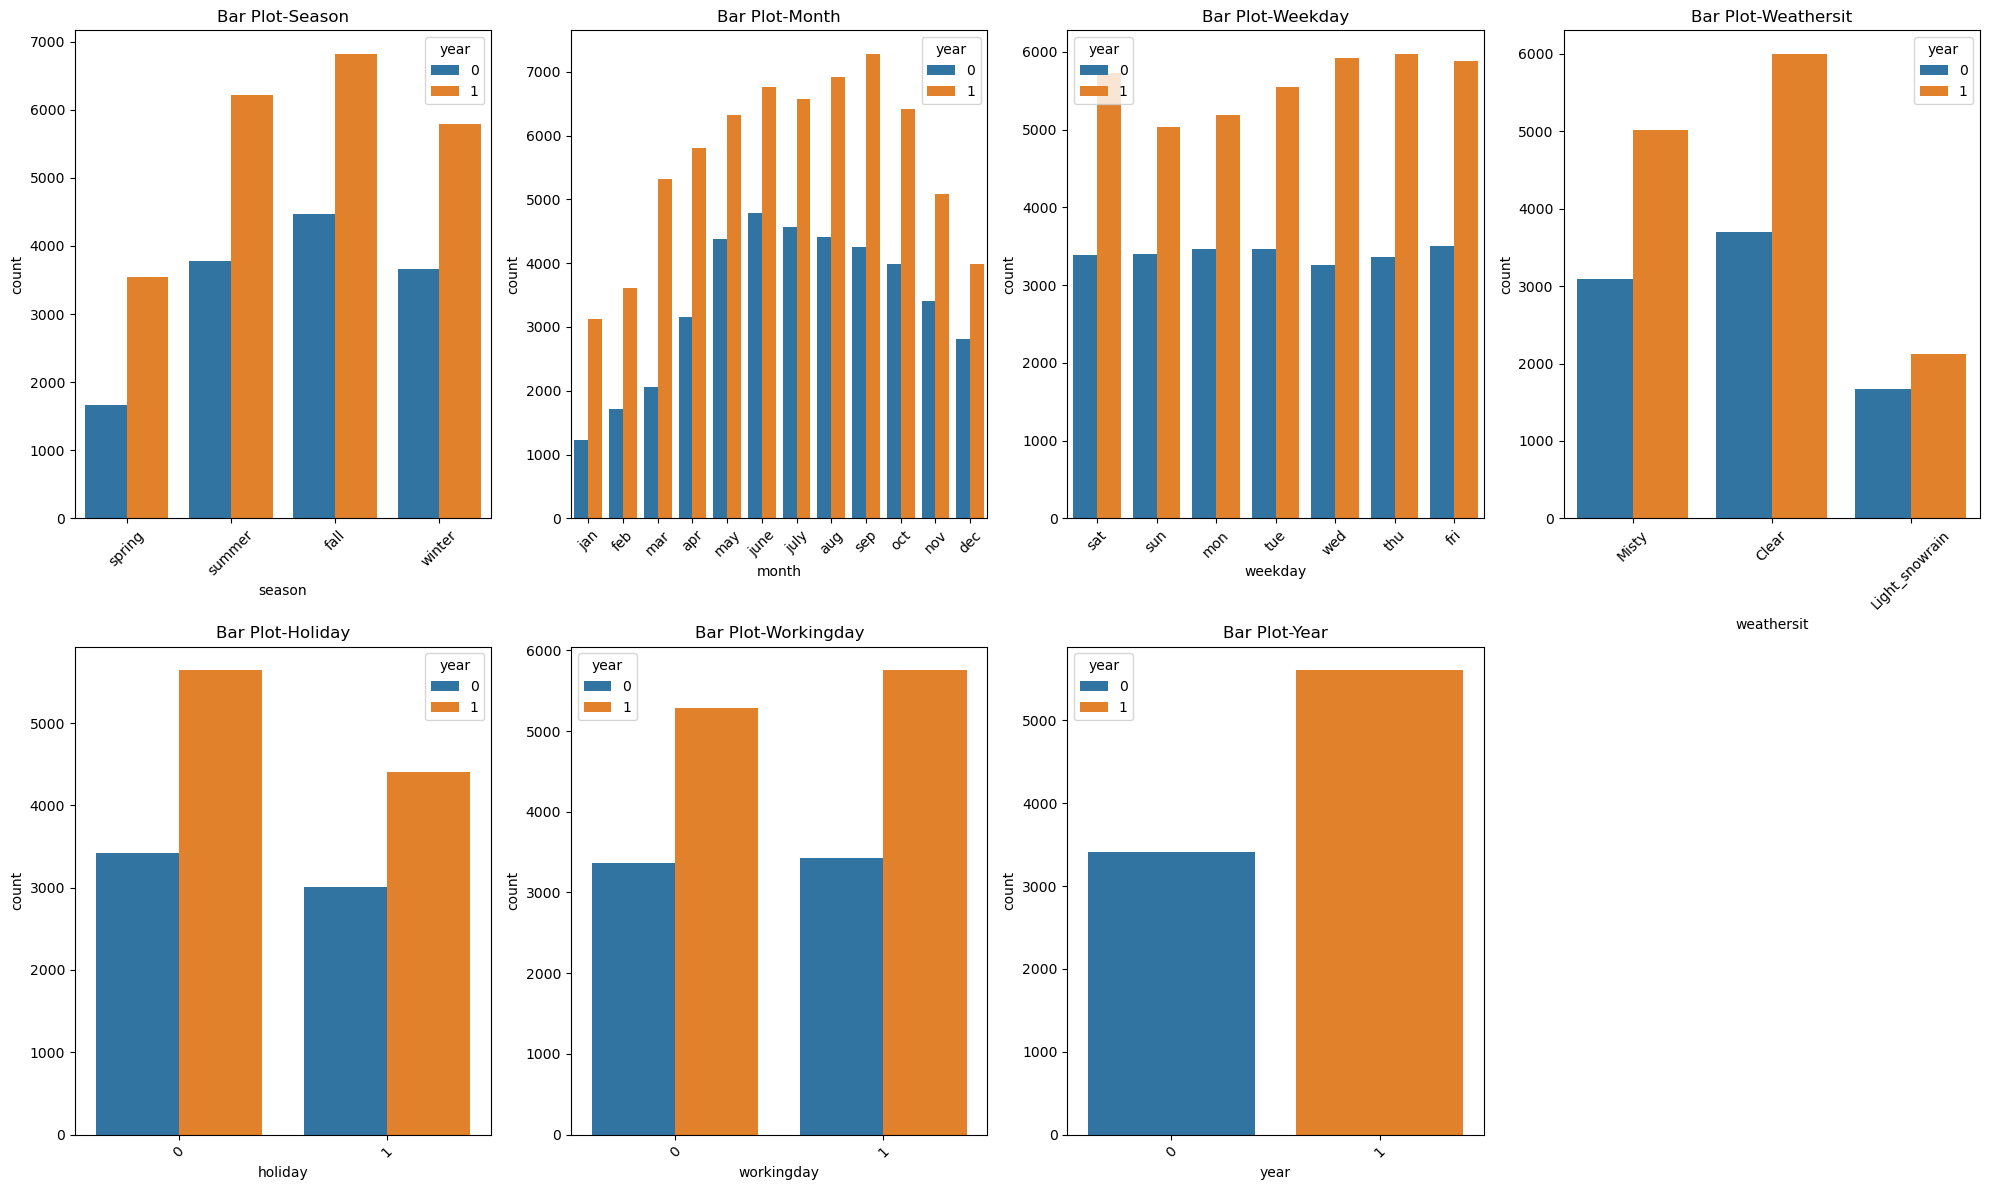

In [1849]:
#2.Analysise the catagorical variables by comparing each catagoriesd with years
plt.figure(figsize=(20, 12))

axes = plt.subplot(2,4,1)
draw_barplot(biking, x = 'season', y = 'count',hue = "year",  ax=axes, title="Bar Plot-Season" )
axes = plt.subplot(2,4,2)
draw_barplot(biking, x = 'month', y = 'count',hue = "year",  ax=axes, title="Bar Plot-Month" )
axes = plt.subplot(2,4,3)
draw_barplot(biking, x = 'weekday', y = 'count',hue = "year",  ax=axes, title="Bar Plot-Weekday" )
axes = plt.subplot(2,4,4)
draw_barplot(biking, x = 'weathersit', y = 'count',hue = "year",  ax=axes, title="Bar Plot-Weathersit" )
axes = plt.subplot(2,4,5)
draw_barplot(biking, x = 'holiday', y = 'count',hue = "year",  ax=axes, title="Bar Plot-Holiday" )
axes = plt.subplot(2,4,6)
draw_barplot(biking, x = 'workingday', y = 'count',hue = "year",  ax=axes, title="Bar Plot-Workingday" )
axes = plt.subplot(2,4,7)
draw_barplot(biking, x = 'year', y = 'count', hue = "year", ax=axes, title="Bar Plot-Year" )


# Show the plots
plt.tight_layout()
plt.show()

In [1850]:
### 2:Analysis on bar plot :
 # season: Fall season attracted more booking follwed by summer and winter. booking volume is increased in 2019 as compare to 2018 for same timefrme.
 # month: Most of the bookings has been done during the month of may, june, july, aug, sep and oct.winter season have low bookings.booking volume is       increased in 2019 as compare to 2018 for same timefrme.
 # weekday: Thursday, firday, saturday have more booking as compare to other weekdays.booking volume is increased in 2019 as compare to 2018 for same timefrme.
 # weathersit: clear wether attracted more booking.booking volume is increased in 2019 as compare to 2018 for same timefrme.
 # holiday: When its not holiday, booking seems to be less in number which seems reasonable as on holidays.booking volume is increased in 2019 as compare to 2018 for same timefrme.
 # workingday:workinf day hav emore booking but not much difference if its weekend or not .booking volume is increased in 2019 as compare to 2018 for same timefrme.
 # year:2019 have increased overall booking .booking volume is increased in 2019 as compare to 2018 for same timefrme.

In [1851]:
# Analysise the catagorical variables.
# draw box plots with each predictor varaible and target varaiable (#Count)

   #Method:Draws a box plot using Seaborn with optional subcategories and subplot positioning.
    #Parameters:
        # df: DataFrame containing the data.
        # x: Column name for the category on the X-axis.
        # y: Column name for the numeric values on the Y-axis.
        # hue: (Optional) Column name for subcategories.
        # rows: Number of subplot rows.
        # cols: Number of subplot columns.
        # position: Position of the subplot in the grid (1-based index).
        # title: (Optional) Title of the plot.
    #Returns:
        # Displays the box plot in the specified subplot position. 
    


def draw_boxplot(df, x, y, ax,fig,hue=None,  title="Box Plot"):
    
    sns.boxplot(data=df, x=x, y=y,hue=hue, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.tick_params(axis='x', rotation=45)

    return ax



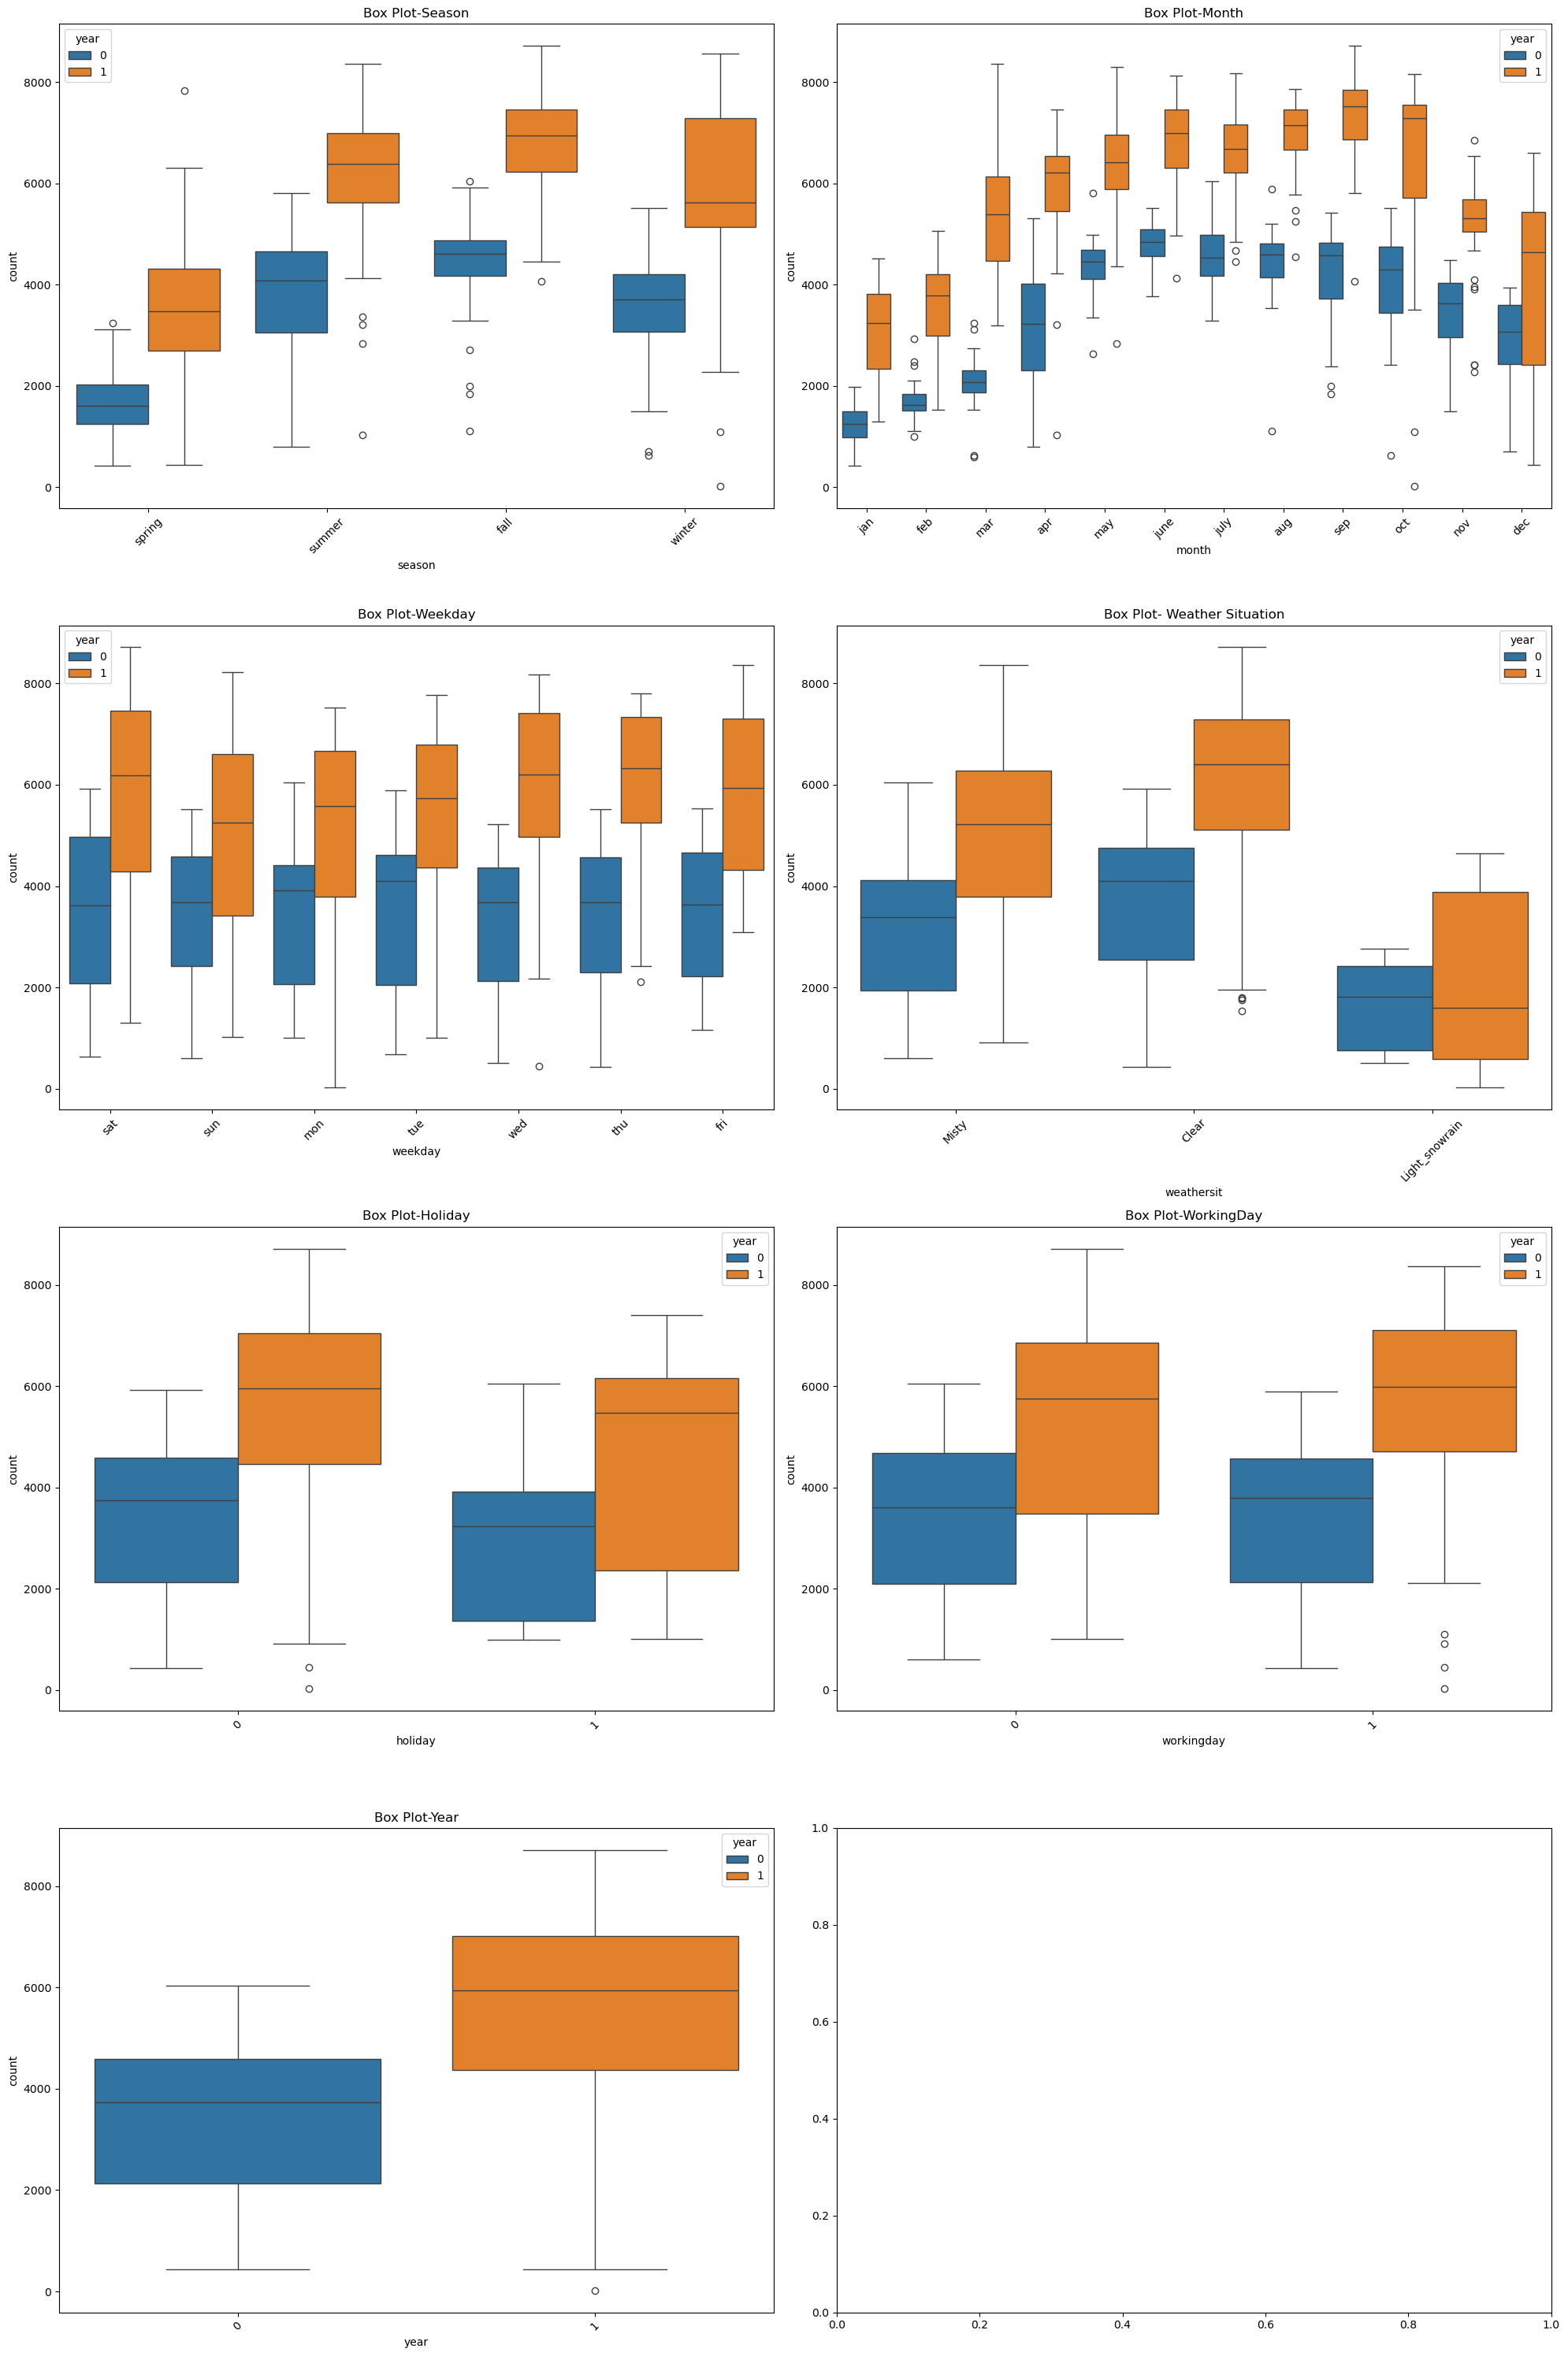

In [1852]:
# Creating subplots (4 rows, 2 columns)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 30))

# Plot 1: Box plot for season vs count
draw_boxplot(biking, x="season", y="count", hue="year", ax=axes[0, 0], fig=fig, title="Box Plot-Season")

# Plot 2: Box plot for month vs count
draw_boxplot(biking, x="month", y="count",hue="year", ax=axes[0, 1], fig=fig, title="Box Plot-Month")

# Plot 3: Box plot for weekday vs count
draw_boxplot(biking, x="weekday", y="count",hue="year", ax=axes[1, 0], fig=fig, title="Box Plot-Weekday")

#sns.boxplot(biking, x="weekday", y="count", ax=axes[0, 2], fig=fig, title="Box Plot-Weekday")

# Plot 4: Box plot for weathersit vs count
draw_boxplot(biking, x="weathersit", y="count",hue="year", ax=axes[1, 1], fig=fig, title="Box Plot- Weather Situation")

# Plot 5: Box plot for holiday vs count
draw_boxplot(biking, x="holiday", y="count",hue="year", ax=axes[2, 0], fig=fig, title="Box Plot-Holiday")

# Plot 6: Box plot for workingday vs count
draw_boxplot(biking, x="workingday", y="count",hue="year", ax=axes[2, 1], fig=fig, title="Box Plot-WorkingDay")

# Plot 7: Box plot for year vs count
draw_boxplot(biking, x="year", y="count",hue="year", ax=axes[3,0], fig=fig, title="Box Plot-Year")

plt.tight_layout()
plt.show()

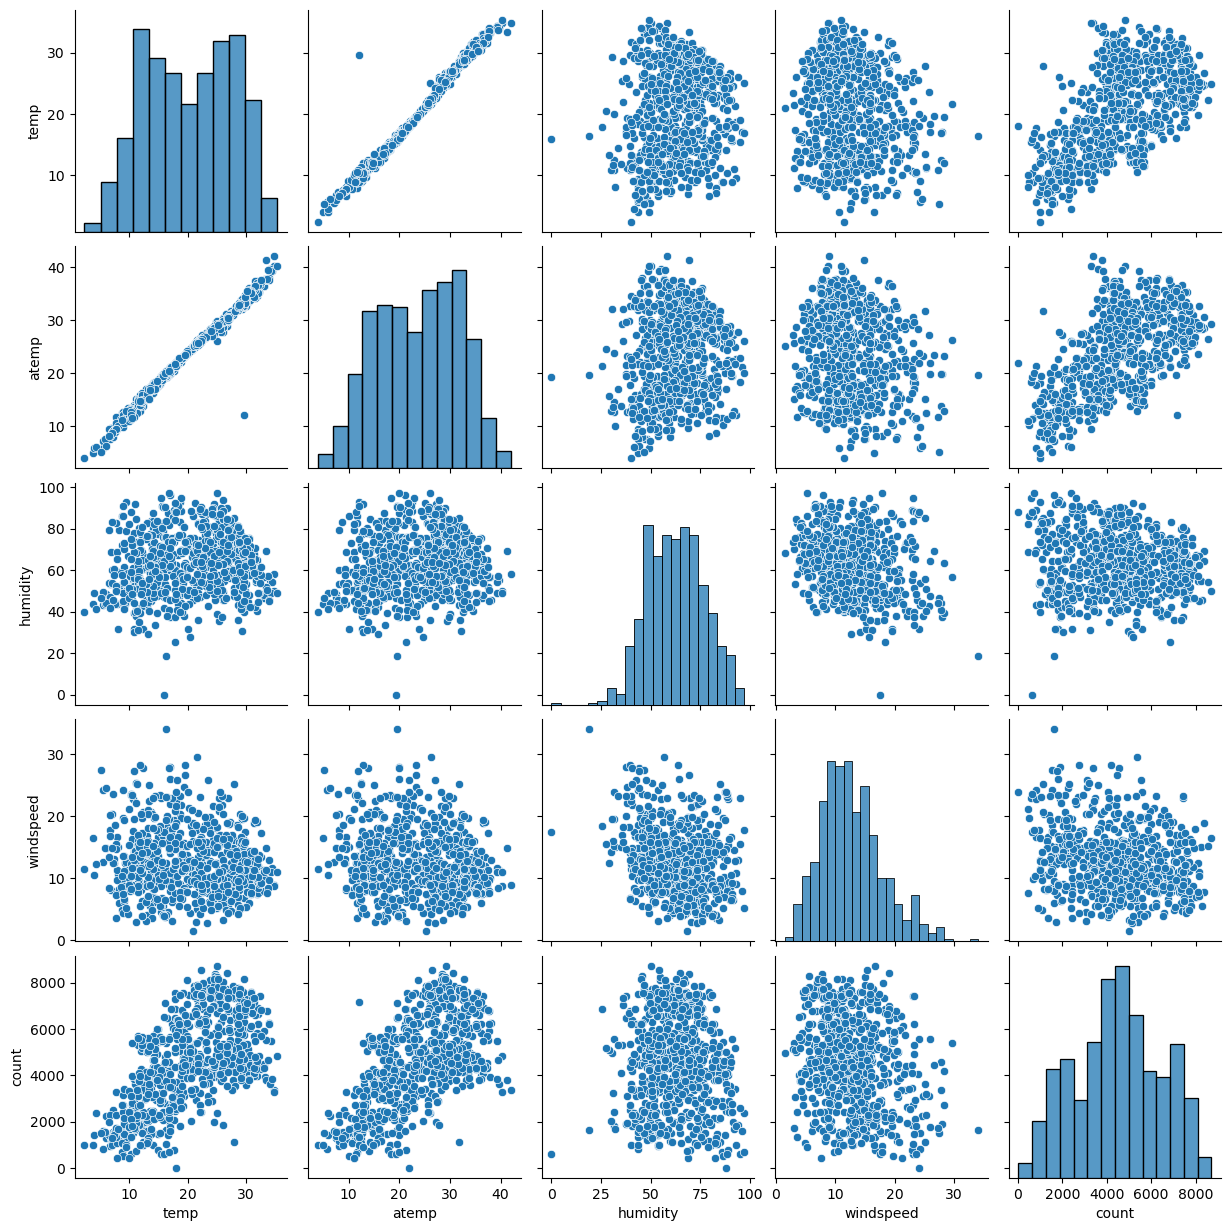

In [1853]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=biking,vars=['temp','atemp','humidity','windspeed','count'])
plt.show()

In [1854]:
# Checking the correlation between the numerical variables
biking[['temp','atemp','humidity','windspeed','count']].corr()

temp     atemp  humidity  windspeed     count
temp       1.000000  0.991696  0.128565  -0.158186  0.627044
atemp      0.991696  1.000000  0.141512  -0.183876  0.630685
humidity   0.128565  0.141512  1.000000  -0.248506 -0.098543
windspeed -0.158186 -0.183876 -0.248506   1.000000 -0.235132
count      0.627044  0.630685 -0.098543  -0.235132  1.000000

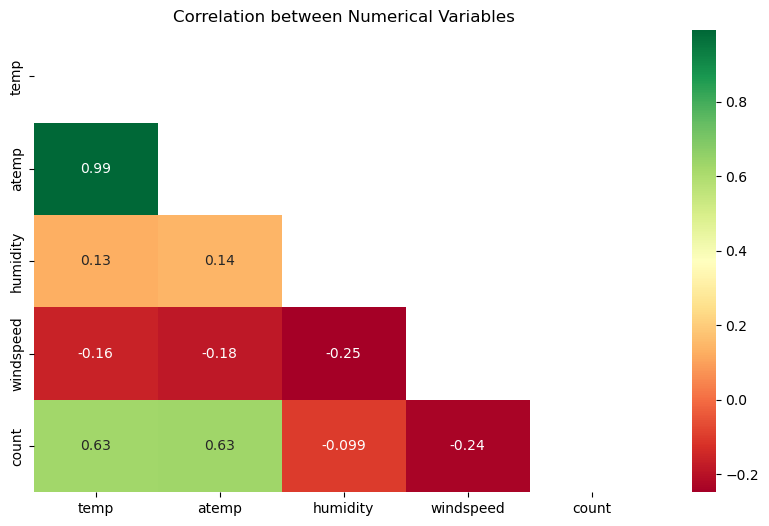

In [1855]:
# draw heatmap to check the correlation between the numerical variables
plt.figure(figsize = (10,6))
upper_triangle  = np.triu(biking[['temp','atemp','humidity','windspeed','count']].corr())
sns.heatmap(biking[['temp','atemp','humidity','windspeed','count']].corr(), annot = True, cmap="RdYlGn", mask=upper_triangle)
plt.title("Correlation between Numerical Variables")
plt.show()

In [1856]:
# we have found the multicolinearity between temp and atemp varaiable. both varaible has linear relationship. 
# while building model we need to drop one varaible based on VIF and p-value 

## Step 3: Data Preparation

In [1858]:
#Steps-
#1. We will create dummy varaibles for month, weekday, weathersit and season variables (all are these catagorical var..).
#2. 

In [1859]:
biking.head(10)

season  year month  holiday weekday  workingday weathersit       temp  \
0  spring     0   jan        0     sat           0      Misty  14.110847   
1  spring     0   jan        0     sun           0      Misty  14.902598   
2  spring     0   jan        0     mon           1      Clear   8.050924   
3  spring     0   jan        0     tue           1      Clear   8.200000   
4  spring     0   jan        0     wed           1      Clear   9.305237   
5  spring     0   jan        0     thu           1      Clear   8.378268   
6  spring     0   jan        0     fri           1      Misty   8.057402   
7  spring     0   jan        0     sat           0      Misty   6.765000   
8  spring     0   jan        0     sun           0      Clear   5.671653   
9  spring     0   jan        0     mon           1      Clear   6.184153   

      atemp  humidity  windspeed  count  
0  18.18125   80.5833  10.749882    985  
1  17.68695   69.6087  16.652113    801  
2   9.47025   43.7273  16.636703   1349  
3  10.60610   59.0435  10.739832   1562  
4  11.46350   43.6957  12.522300   1600  
5  11.66045   51.8261   6.000868   1606  
6  10.44195   49.8696  11.304642   1510  
7   8.11270   53.5833  17.875868    959  
8   5.80875   43.4167  24.250650    822  
9   7.54440   48.2917  14.958889   1321

In [1860]:
# Dummy variable creation for month, weekday, weathersit and season variables.
months_df=pd.get_dummies(biking.month,drop_first=True)
weekdays_df=pd.get_dummies(biking.weekday,drop_first=True)
weathersit_df=pd.get_dummies(biking.weathersit,drop_first=True)
seasons_df=pd.get_dummies(biking.season,drop_first=True)


In [1861]:
biking.head()

season  year month  holiday weekday  workingday weathersit       temp  \
0  spring     0   jan        0     sat           0      Misty  14.110847   
1  spring     0   jan        0     sun           0      Misty  14.902598   
2  spring     0   jan        0     mon           1      Clear   8.050924   
3  spring     0   jan        0     tue           1      Clear   8.200000   
4  spring     0   jan        0     wed           1      Clear   9.305237   

      atemp  humidity  windspeed  count  
0  18.18125   80.5833  10.749882    985  
1  17.68695   69.6087  16.652113    801  
2   9.47025   43.7273  16.636703   1349  
3  10.60610   59.0435  10.739832   1562  
4  11.46350   43.6957  12.522300   1600

In [1862]:
# Merging  the dataframe, with the dummy variable dataset. 

biking_df = pd.concat([biking,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)


In [1863]:
biking_df.head()

season  year month  holiday weekday  workingday weathersit       temp  \
0  spring     0   jan        0     sat           0      Misty  14.110847   
1  spring     0   jan        0     sun           0      Misty  14.902598   
2  spring     0   jan        0     mon           1      Clear   8.050924   
3  spring     0   jan        0     tue           1      Clear   8.200000   
4  spring     0   jan        0     wed           1      Clear   9.305237   

      atemp  humidity  ...    sat    sun    thu    tue    wed  Light_snowrain  \
0  18.18125   80.5833  ...   True  False  False  False  False           False   
1  17.68695   69.6087  ...  False   True  False  False  False           False   
2   9.47025   43.7273  ...  False  False  False  False  False           False   
3  10.60610   59.0435  ...  False  False  False   True  False           False   
4  11.46350   43.6957  ...  False  False  False  False   True           False   

   Misty  spring  summer  winter  
0   True    True   False   False  
1   True    True   False   False  
2  False    True   False   False  
3  False    True   False   False  
4  False    True   False   False  

[5 rows x 34 columns]

In [1864]:
# convert true /false values to 0/1

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to all boolean columns
for col in biking_df.select_dtypes(include=['bool']).columns:
    biking_df[col] = le.fit_transform(biking_df[col])

In [1865]:
biking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  count           730 non-null    int64  
 12  aug             730 non-null    int64  
 13  dec             730 non-null    int64  
 14  feb             730 non-null    int64  
 15  jan             730 non-null    int64  
 16  july            730 non-null    int64  
 17  june            730 non-null    int

In [1866]:
# finally we have dummy varaibles in our dataframe , total columns count is - 30 .
# check the shape of new dataframe

biking_df.shape
biking_df.head()

season  year month  holiday weekday  workingday weathersit       temp  \
0  spring     0   jan        0     sat           0      Misty  14.110847   
1  spring     0   jan        0     sun           0      Misty  14.902598   
2  spring     0   jan        0     mon           1      Clear   8.050924   
3  spring     0   jan        0     tue           1      Clear   8.200000   
4  spring     0   jan        0     wed           1      Clear   9.305237   

      atemp  humidity  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  \
0  18.18125   80.5833  ...    1    0    0    0    0               0      1   
1  17.68695   69.6087  ...    0    1    0    0    0               0      1   
2   9.47025   43.7273  ...    0    0    0    0    0               0      0   
3  10.60610   59.0435  ...    0    0    0    1    0               0      0   
4  11.46350   43.6957  ...    0    0    0    0    1               0      0   

   spring  summer  winter  
0       1       0       0  
1       1       0       0  
2       1       0       0  
3       1       0       0  
4       1       0       0  

[5 rows x 34 columns]

In [1867]:
# dropping unnecessary columns as we have already created dummy variable out of it.

biking_df.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

## Step 4: Splitting the Data into TRAIN & TEST Sets

In [1869]:
# split the data into Train and Test using sklearn library
biking_train, biking_test = train_test_split(biking_df, train_size = 0.7, random_state = 100)

In [1870]:
# check the shape of training & test datatset
print(biking_train.shape)
print(biking_test.shape)

(510, 30)
(220, 30)


In [1871]:
biking_test.head()

year  holiday  workingday       temp     atemp  humidity  windspeed  \
184     0        1           0  29.793347  33.27085   63.7917   5.459106   
535     1        0           1  32.082500  36.04875   59.2083   7.625404   
299     0        0           1  19.270000  22.85230   81.2917  13.250121   
221     0        0           1  31.433347  34.24915   42.4167  13.417286   
152     0        0           1  29.315000  32.19710   30.5000  19.583229   

     count  aug  dec  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  \
184   6043    0    0  ...    0    0    0    0    0               0      1   
535   6211    0    0  ...    0    0    0    0    1               0      0   
299   2659    0    0  ...    0    0    1    0    0               0      1   
221   4780    1    0  ...    0    0    0    0    1               0      0   
152   4968    0    0  ...    0    0    1    0    0               0      0   

     spring  summer  winter  
184       0       0       0  
535       0       1       0  
299       0       0       1  
221       0       0       0  
152       0       1       0  

[5 rows x 30 columns]

In [1872]:
# Let us scale all the variables except yes/no  and dummy varaibles.
num_vars = ['temp','atemp','humidity','windspeed','count']

#Use Normalized/MinMaxScaler scaler to scaling the dataset
scaler = MinMaxScaler()

# scaling only train dataset
biking_train[num_vars] = scaler.fit_transform(biking_train[num_vars])

biking_train.head()

year  holiday  workingday      temp     atemp  humidity  windspeed  \
576     1        0           1  0.815169  0.766351  0.725633   0.264686   
426     1        0           0  0.442393  0.438975  0.640189   0.255342   
728     1        0           0  0.245101  0.200348  0.498067   0.663106   
482     1        0           0  0.395666  0.391735  0.504508   0.188475   
111     0        0           1  0.345824  0.318819  0.751824   0.380981   

        count  aug  dec  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  \
576  0.827658    0    0  ...    0    0    0    1    0               0      0   
426  0.465255    0    0  ...    1    0    0    0    0               0      1   
728  0.204096    0    1  ...    0    1    0    0    0               0      0   
482  0.482973    0    0  ...    1    0    0    0    0               0      1   
111  0.191095    0    0  ...    0    0    0    0    0               0      1   

     spring  summer  winter  
576       0       0       0  
426       1       0       0  
728       1       0       0  
482       0       1       0  
111       0       1       0  

[5 rows x 30 columns]

In [1873]:
# analyse the training  dataset
biking_train.describe()

year     holiday  workingday        temp       atemp    humidity  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537440    0.513156    0.650480   
std      0.500429    0.157763    0.468282    0.225858    0.212410    0.145846   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.542596    0.529718    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed       count         aug         dec  ...         sat  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.320883    0.513499    0.096078    0.084314  ...    0.154902   
std      0.169803    0.224421    0.294988    0.278131  ...    0.362166   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.199179    0.356420    0.000000    0.000000  ...    0.000000   
50%      0.296763    0.518638    0.000000    0.000000  ...    0.000000   
75%      0.414447    0.684710    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              sun         thu         tue         wed  Light_snowrain  \
count  510.000000  510.000000  510.000000  510.000000      510.000000   
mean     0.143137    0.133333    0.131373    0.158824        0.029412   
std      0.350557    0.340268    0.338139    0.365870        0.169124   
min      0.000000    0.000000    0.000000    0.000000        0.000000   
25%      0.000000    0.000000    0.000000    0.000000        0.000000   
50%      0.000000    0.000000    0.000000    0.000000        0.000000   
75%      0.000000    0.000000    0.000000    0.000000        0.000000   
max      1.000000    1.000000    1.000000    1.000000        1.000000   

            Misty      spring      summer      winter  
count  510.000000  510.000000  510.000000  510.000000  
mean     0.345098    0.243137    0.247059    0.247059  
std      0.475867    0.429398    0.431725    0.431725  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      1.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 30 columns]

In [1874]:
biking_train.corr()

year   holiday  workingday      temp     atemp  humidity  \
year            1.000000 -0.014980    0.031808  0.108054  0.104971 -0.084061   
holiday        -0.014980  1.000000   -0.233863 -0.066405 -0.070760 -0.029224   
workingday      0.031808 -0.233863    1.000000  0.068326  0.068349  0.032525   
temp            0.108054 -0.066405    0.068326  1.000000  0.989539  0.155252   
atemp           0.104971 -0.070760    0.068349  0.989539  1.000000  0.169341   
humidity       -0.084061 -0.029224    0.032525  0.155252  0.169341  1.000000   
windspeed      -0.000439  0.017458   -0.042704 -0.187281 -0.215108 -0.267126   
count           0.591433 -0.095948    0.092019  0.645048  0.647944 -0.058793   
aug             0.054774 -0.052728    0.040575  0.387176  0.359727  0.052949   
dec            -0.040049 -0.004302   -0.031500 -0.273091 -0.262072  0.057615   
feb            -0.019916  0.056524   -0.016803 -0.296213 -0.299686 -0.129780   
jan            -0.011794  0.037412   -0.021296 -0.446941 -0.451026 -0.071906   
july            0.017623 -0.046539   -0.006030  0.413678  0.406832 -0.054070   
june            0.017623 -0.046539    0.009741  0.301219  0.293970 -0.095077   
mar            -0.005172 -0.053321    0.030677 -0.179941 -0.178698 -0.111040   
may            -0.025933 -0.049076    0.059006  0.155168  0.161665  0.145409   
nov            -0.018790  0.127543   -0.041271 -0.194994 -0.185918  0.004676   
oct            -0.025933 -0.004302   -0.046584 -0.018286 -0.005162  0.167153   
sep             0.002574  0.043692    0.019495  0.207212  0.205900  0.152439   
mon             0.053634  0.279279    0.174565 -0.032455 -0.025473  0.022296   
sat            -0.033817 -0.069242   -0.619074 -0.042608 -0.043785 -0.040858   
sun            -0.000812 -0.066102   -0.591001 -0.017367 -0.014223  0.011915   
thu            -0.006153  0.009759    0.246594  0.002518  0.006022 -0.038530   
tue            -0.000296 -0.062897    0.268948  0.048662  0.051493  0.012087   
wed            -0.001452 -0.070276    0.300501  0.029020  0.027554  0.046866   
Light_snowrain -0.060764 -0.028154    0.021159 -0.036227 -0.044398  0.244965   
Misty          -0.011388 -0.038895    0.043563 -0.089452 -0.085086  0.479436   
spring         -0.036320  0.053339   -0.037932 -0.606396 -0.611118 -0.201616   
summer          0.018294 -0.063798    0.046302  0.126057  0.136550 -0.014192   
winter         -0.027174  0.051582   -0.060593 -0.234200 -0.211852  0.173980   

                windspeed     count       aug       dec  ...       sat  \
year            -0.000439  0.591433  0.054774 -0.040049  ... -0.033817   
holiday          0.017458 -0.095948 -0.052728 -0.004302  ... -0.069242   
workingday      -0.042704  0.092019  0.040575 -0.031500  ... -0.619074   
temp            -0.187281  0.645048  0.387176 -0.273091  ... -0.042608   
atemp           -0.215108  0.647944  0.359727 -0.262072  ... -0.043785   
humidity        -0.267126 -0.058793  0.052949  0.057615  ... -0.040858   
windspeed        1.000000 -0.253038 -0.111460 -0.061179  ...  0.049063   
count           -0.253038  1.000000  0.227578 -0.143546  ... -0.015998   
aug             -0.111460  0.227578  1.000000 -0.098929  ...  0.007536   
dec             -0.061179 -0.143546 -0.098929  1.000000  ...  0.045624   
feb              0.132936 -0.270351 -0.087133 -0.081098  ... -0.027519   
jan              0.006582 -0.378296 -0.101421 -0.094396  ...  0.019669   
july            -0.085671  0.158087 -0.093814 -0.087317  ... -0.000840   
june            -0.033103  0.195411 -0.093814 -0.087317  ... -0.000840   
mar              0.141944 -0.137465 -0.107486 -0.100042  ...  0.022870   
may             -0.034342  0.113276 -0.098929 -0.092077  ... -0.051896   
nov              0.009742 -0.048002 -0.100180 -0.093241  ... -0.015744   
oct             -0.018546  0.055558 -0.098929 -0.092077  ...  0.006616   
sep             -0.121930  0.201639 -0.096395 -0.089718  ... -0.006996   
mon             -0.004658 -0.009333 -0.025981  0.010010  ..

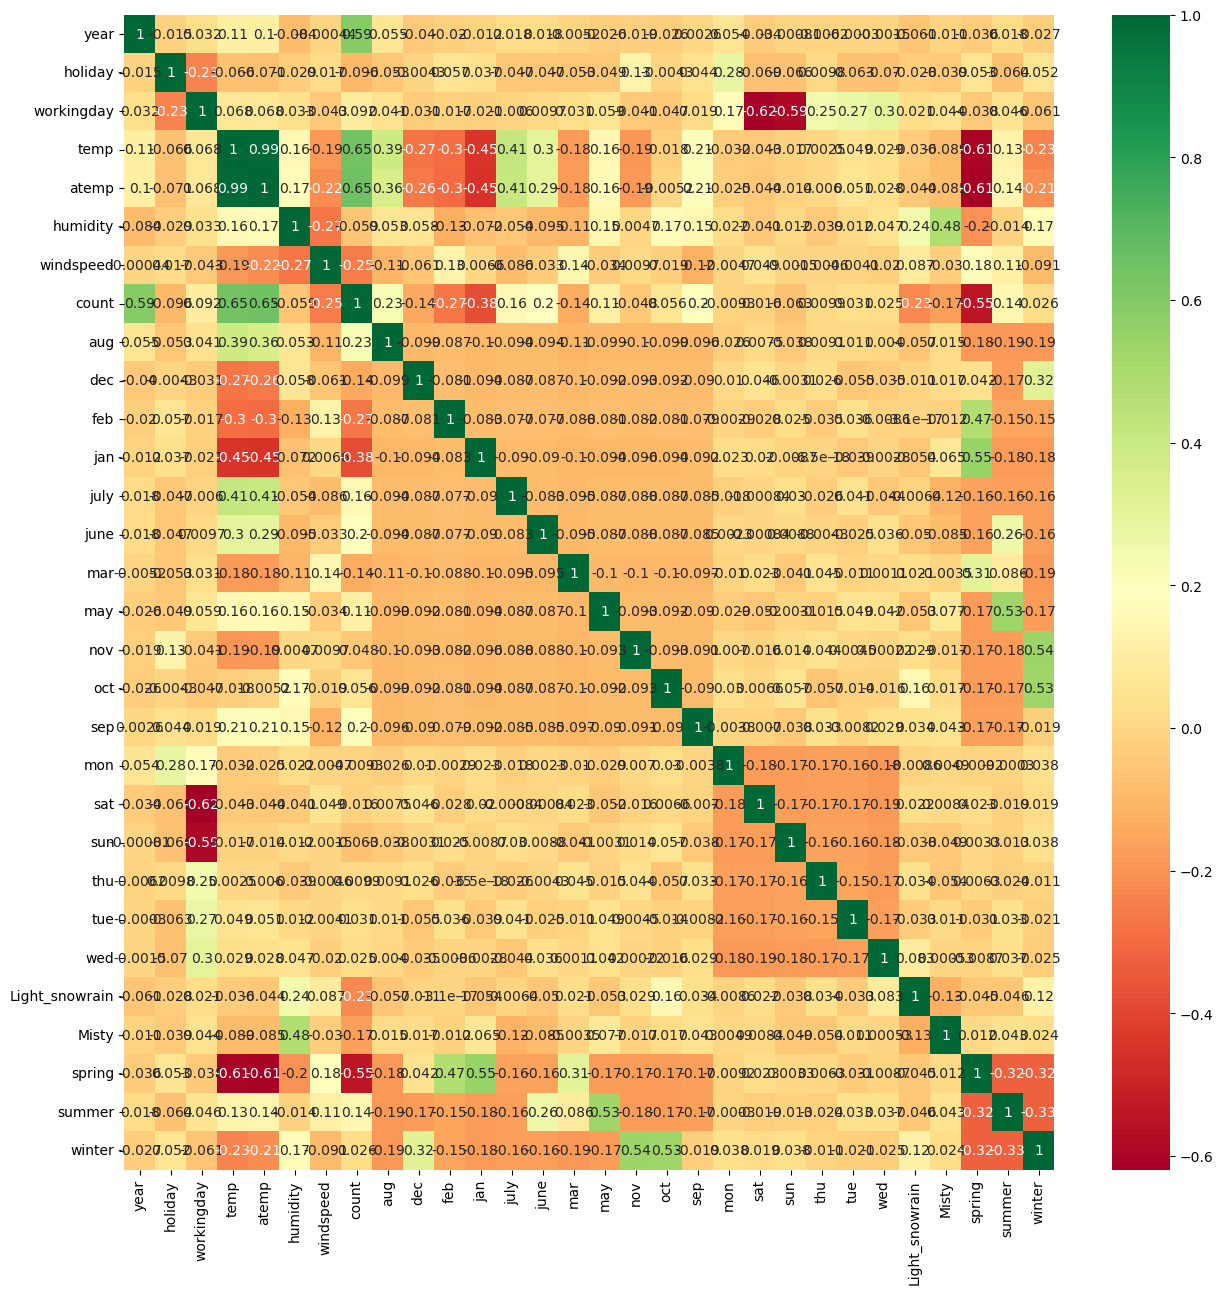

In [1875]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (15,15))
sns.heatmap(biking_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

## Step 5: Building the Linear Model using RFE

In [1877]:
biking_test.head()

year  holiday  workingday       temp     atemp  humidity  windspeed  \
184     0        1           0  29.793347  33.27085   63.7917   5.459106   
535     1        0           1  32.082500  36.04875   59.2083   7.625404   
299     0        0           1  19.270000  22.85230   81.2917  13.250121   
221     0        0           1  31.433347  34.24915   42.4167  13.417286   
152     0        0           1  29.315000  32.19710   30.5000  19.583229   

     count  aug  dec  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  \
184   6043    0    0  ...    0    0    0    0    0               0      1   
535   6211    0    0  ...    0    0    0    0    1               0      0   
299   2659    0    0  ...    0    0    1    0    0               0      1   
221   4780    1    0  ...    0    0    0    0    1               0      0   
152   4968    0    0  ...    0    0    1    0    0               0      0   

     spring  summer  winter  
184       0       0       0  
535       0       1       0  
299       0       0       1  
221       0       0       0  
152       0       1       0  

[5 rows x 30 columns]

In [1878]:
# Building the Linear Model

y_train = biking_train.pop('count')
X_train = biking_train


In [1879]:
# Recursive feature elimination 

# Initialize linear regression model
# (Do NOT fit it before passing to RFE)
lm = LinearRegression()


# selecting Top 15, 15 → The number of top features to select.
# Apply RFE to select 15 best features
rfe = RFE(estimator=lm, n_features_to_select=15)


rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [1880]:
# Get selected feature names
selected_features = [feature for feature, rank in zip(X_train.columns, rfe.support_) if rank]

# Print selected features
print("Selected Features:", selected_features)

Selected Features: ['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jan', 'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer', 'winter']


In [1881]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [1882]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [1883]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [1884]:
# method to calculate the VIF
# Generic function to calculate VIF of variables

def fetch_VIF(df):
    df = df.select_dtypes(include=[np.number])  # Ensure only numeric data
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif 

In [1885]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [1886]:
# calculate VIF

fetch_VIF(X_train_rfe)

Features    VIF
4         humidity  29.37
3             temp  17.78
2       workingday   5.31
5        windspeed   4.73
12          spring   4.53
14          winter   3.46
13          summer   2.85
11           Misty   2.29
0             year   2.09
9              sat   1.98
6              jan   1.67
7             july   1.59
8              sep   1.39
10  Light_snowrain   1.24
1          holiday   1.18

In [1887]:
# humidity got very high VIF, VIF value should <= 5 for ideal model

## Step 5: Building a linear model

In [1889]:
# Building 1st linear regression model
#  Dataset => biking_train -> X_train,y_train
# Train Dataset with RFE selected variable => X_train_rfe

In [1890]:
#Function to build a model using statsmodel api
def build_lm_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [1891]:
# method to calculate the VIF by columns
# Generic function to calculate VIF of variables

def fetch_VIF_byCols(cols):
    df = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    print(vif.sort_values(by="VIF", ascending=False))
    

In [1892]:
# columns in model to consider
#Selected columns for Model 1 - all columns selected by RFE
print(col)
cols = ['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter']

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


#### Model-1:  Building 1st linear regression model

In [1894]:
build_lm_model(col)
fetch_VIF_byCols(col)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          4.22e-191
Time:                        14:44:54   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.

#### Model-2:  Building 2nd linear regression model

In [1896]:
# As humidity shows high VIF values hence we can drop it and it has negative coefficient
# Dropping the variable humidity
cols = ['year', 'holiday', 'workingday', 'temp', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter']

build_lm_model(cols)
fetch_VIF_byCols(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          1.60e-188
Time:                        14:44:54   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.

#### Model-3:  Building 3rd linear regression model

In [1898]:
# As holiday shows high p-value
# Dropping the variable holiday
cols = ['year', 'workingday', 'temp', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter']

build_lm_model(cols)
fetch_VIF_byCols(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          8.68e-189
Time:                        14:44:54   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1657      0.031      5.

#### Model-4:  Building 4th linear regression model

In [1900]:
# As Jan shows  high p-value
# Dropping the variable jan
cols = ['year', 'workingday', 'temp', 'windspeed',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter']

build_lm_model(cols)
fetch_VIF_byCols(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          7.12e-189
Time:                        14:44:54   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1492      0.031      4.

#### Model-5:  Building 5th linear regression model

In [1902]:
# As july shows high p-value
# Dropping the variable July
cols = ['year', 'workingday', 'temp', 'windspeed',
        'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter']

build_lm_model(cols)
fetch_VIF_byCols(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          1.42e-188
Time:                        14:44:54   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1406      0.031      4.

In [1903]:
#### Model-6:  Building 6th linear regression model - Checking if dropping spring can make any change in model.

In [1904]:
# Dropping the variable spring
cols6 = ['year', 'workingday', 'temp', 'windspeed',
        'sep', 'sat', 'Light_snowrain', 'Misty',  'summer',
       'winter']

lr_model_6=build_lm_model(cols6)
fetch_VIF_byCols(cols6)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          3.13e-188
Time:                        14:44:54   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0750      0.019      4.

#### 1- We can cosider the above model-6, as it seems to have very low multicolinearity between the predictors AND the p-values for all the predictors seems to be significant.
#### 2- F-Statistics value of 253.0 and Prob (F-statistic) of 3.13e-188, states that the overall model is significant


In [1906]:
# Checking the parameters and their coefficient values
lr_model_6.params

const             0.075009
year              0.233139
workingday        0.056117
temp              0.549892
windspeed        -0.155203
sep               0.097365
sat               0.067500
Light_snowrain   -0.287090
Misty            -0.080022
summer            0.088621
winter            0.130655
dtype: float64

## Step 6: Residual Analysis of the train data and validation

In [1908]:
X_train_lm_6 = X_train[cols6]

In [1909]:
# Our X_train Dataset #10 columns
X_train_lm_6

year  workingday      temp  windspeed  sep  sat  Light_snowrain  Misty  \
576     1           1  0.815169   0.264686    0    0               0      0   
426     1           0  0.442393   0.255342    0    1               0      1   
728     1           0  0.245101   0.663106    0    0               0      0   
482     1           0  0.395666   0.188475    0    1               0      1   
111     0           1  0.345824   0.380981    0    0               0      1   
..    ...         ...       ...        ...  ...  ...             ...    ...   
578     1           1  0.863973   0.187140    0    0               0      0   
53      0           1  0.202618   0.111379    0    0               0      0   
350     0           0  0.248216   0.431816    0    1               0      1   
79      0           1  0.462664   0.529881    0    0               0      1   
520     1           1  0.600225   0.359599    0    0               0      1   

     summer  winter  
576       0       0  
426       0       0  
728       0       0  
482       1       0  
111       1       0  
..      ...     ...  
578       0       0  
53        0       0  
350       0       1  
79        1       0  
520       1       0  

[510 rows x 10 columns]

In [1910]:
lr_model_6.params

const             0.075009
year              0.233139
workingday        0.056117
temp              0.549892
windspeed        -0.155203
sep               0.097365
sat               0.067500
Light_snowrain   -0.287090
Misty            -0.080022
summer            0.088621
winter            0.130655
dtype: float64

In [1911]:
# our model: lr_model_6 have 10 params an done constant : total -11 paramaters
# Adding constant in our training dataset-
X_train_lm_6 = sm.add_constant(X_train_lm_6) 


In [1912]:
#y_train_pred = lr_model_6.predict(X_train_lm_6)
X_train_lm_6

const  year  workingday      temp  windspeed  sep  sat  Light_snowrain  \
576    1.0     1           1  0.815169   0.264686    0    0               0   
426    1.0     1           0  0.442393   0.255342    0    1               0   
728    1.0     1           0  0.245101   0.663106    0    0               0   
482    1.0     1           0  0.395666   0.188475    0    1               0   
111    1.0     0           1  0.345824   0.380981    0    0               0   
..     ...   ...         ...       ...        ...  ...  ...             ...   
578    1.0     1           1  0.863973   0.187140    0    0               0   
53     1.0     0           1  0.202618   0.111379    0    0               0   
350    1.0     0           0  0.248216   0.431816    0    1               0   
79     1.0     0           1  0.462664   0.529881    0    0               0   
520    1.0     1           1  0.600225   0.359599    0    0               0   

     Misty  summer  winter  
576      0       0       0  
426      1       0       0  
728      0       0       0  
482      1       1       0  
111      1       1       0  
..     ...     ...     ...  
578      0       0       0  
53       0       0       0  
350      1       0       1  
79       1       1       0  
520      1       1       0  

[510 rows x 11 columns]

In [1913]:
y_train_pred = lr_model_6.predict(X_train_lm_6)

#### Normality of error terms

Text(0.5, 0, 'Errors')

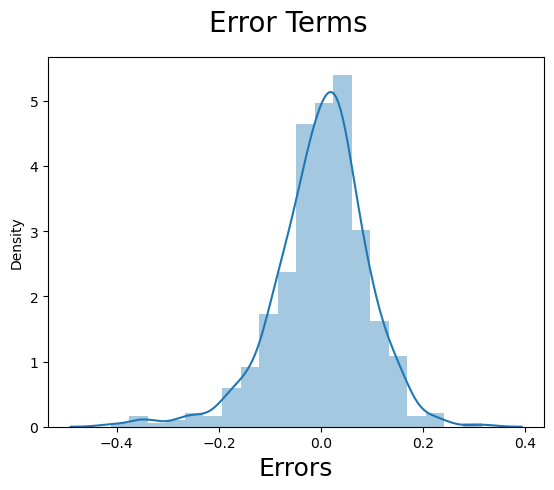

In [1915]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [1916]:
#### checking Multi Colinearity

In [1917]:
X_train_new = X_train[cols6]
fetch_VIF(X_train_new)

Features   VIF
2            temp  4.76
1      workingday  4.04
3       windspeed  3.44
0            year  2.02
5             sat  1.69
8          summer  1.57
7           Misty  1.53
9          winter  1.40
4             sep  1.20
6  Light_snowrain  1.08

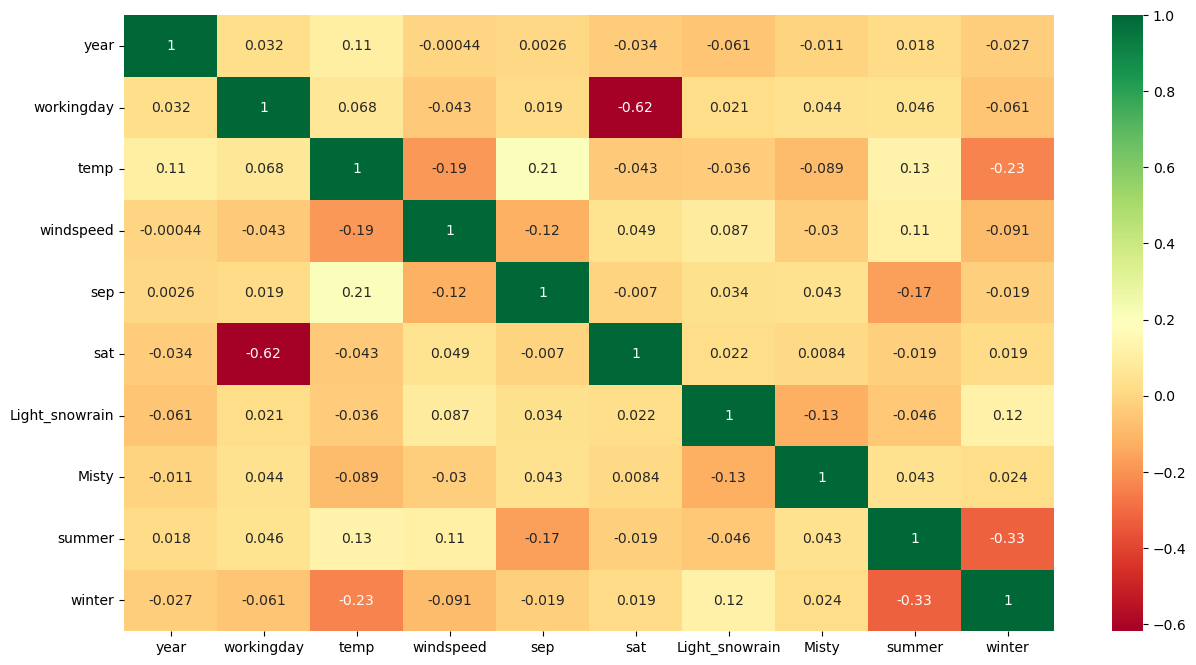

In [1918]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

## Step 7: Making Predictions Using the Final Model


In [1920]:
biking_test.shape

(220, 30)

In [1921]:
# Let us scale all the variables except yes/no  and dummy varaibles.
num_vars = ['temp','atemp','humidity','windspeed','count']

#Use Normalized/MinMaxScaler scaler to scaling the dataset
#scaler = MinMaxScaler()

# scaling only test dataset
biking_test[num_vars] = scaler.transform(biking_test[num_vars])

biking_test.head()

year  holiday  workingday      temp     atemp  humidity  windspeed  \
184     0        1           0  0.831783  0.769660  0.657364   0.084219   
535     1        0           1  0.901354  0.842587  0.610133   0.153728   
299     0        0           1  0.511964  0.496145  0.837699   0.334206   
221     0        0           1  0.881625  0.795343  0.437098   0.339570   
152     0        0           1  0.817246  0.741471  0.314298   0.537414   

        count  aug  dec  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  \
184  0.692706    0    0  ...    0    0    0    0    0               0      1   
535  0.712034    0    0  ...    0    0    0    0    1               0      0   
299  0.303382    0    0  ...    0    0    1    0    0               0      1   
221  0.547400    1    0  ...    0    0    0    0    1               0      0   
152  0.569029    0    0  ...    0    0    1    0    0               0      0   

     spring  summer  winter  
184       0       0       0  
535       0       1       0  
299       0       0       1  
221       0       0       0  
152       0       1       0  

[5 rows x 30 columns]

In [1922]:
biking_test.describe()

year     holiday  workingday        temp       atemp    humidity  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.481818    0.036364    0.700000    0.558718    0.532847    0.638221   
std      0.500809    0.187620    0.459303    0.233187    0.217401    0.148694   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.355429    0.344870    0.529197   
50%      0.000000    0.000000    1.000000    0.558172    0.544652    0.625590   
75%      1.000000    0.000000    1.000000    0.755981    0.713308    0.743798   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed       count         aug         dec  ...         sat  \
count  220.000000  220.000000  220.000000  220.000000  ...  220.000000   
mean     0.313293    0.522154    0.059091    0.086364  ...    0.118182   
std      0.159584    0.219163    0.236333    0.281541  ...    0.323559   
min     -0.042808    0.048205    0.000000    0.000000  ...    0.000000   
25%      0.198843    0.378595    0.000000    0.000000  ...    0.000000   
50%      0.300126    0.524678    0.000000    0.000000  ...    0.000000   
75%      0.402718    0.677750    0.000000    0.000000  ...    0.000000   
max      0.807474    0.963300    1.000000    1.000000  ...    1.000000   

              sun         thu         tue         wed  Light_snowrain  \
count  220.000000  220.000000  220.000000  220.000000      220.000000   
mean     0.145455    0.163636    0.168182    0.100000        0.027273   
std      0.353363    0.370789    0.374881    0.300684        0.163248   
min      0.000000    0.000000    0.000000    0.000000        0.000000   
25%      0.000000    0.000000    0.000000    0.000000        0.000000   
50%      0.000000    0.000000    0.000000    0.000000        0.000000   
75%      0.000000    0.000000    0.000000    0.000000        0.000000   
max      1.000000    1.000000    1.000000    1.000000        1.000000   

            Misty      spring      summer      winter  
count  220.000000  220.000000  220.000000  220.000000  
mean     0.318182    0.254545    0.263636    0.236364  
std      0.466833    0.436599    0.441609    0.425817  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      1.000000    1.000000    1.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 30 columns]

In [1804]:
X_train_new

year  workingday      temp  windspeed  sep  sat  Light_snowrain  Misty  \
576     1           1  0.815169   0.264686    0    0               0      0   
426     1           0  0.442393   0.255342    0    1               0      1   
728     1           0  0.245101   0.663106    0    0               0      0   
482     1           0  0.395666   0.188475    0    1               0      1   
111     0           1  0.345824   0.380981    0    0               0      1   
..    ...         ...       ...        ...  ...  ...             ...    ...   
578     1           1  0.863973   0.187140    0    0               0      0   
53      0           1  0.202618   0.111379    0    0               0      0   
350     0           0  0.248216   0.431816    0    1               0      1   
79      0           1  0.462664   0.529881    0    0               0      1   
520     1           1  0.600225   0.359599    0    0               0      1   

     summer  winter  
576       0       0  
426       0       0  
728       0       0  
482       1       0  
111       1       0  
..      ...     ...  
578       0       0  
53        0       0  
350       0       1  
79        1       0  
520       1       0  

[510 rows x 10 columns]

In [2006]:
y_test = biking_test.pop('count')
X_test = biking_test

In [2008]:
# Extracts teh columns from Train dataset
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [2010]:
X_test.head()

year  workingday      temp  windspeed  sep  sat  Light_snowrain  Misty  \
184     0           0  0.831783   0.084219    0    0               0      1   
535     1           1  0.901354   0.153728    0    0               0      0   
299     0           1  0.511964   0.334206    0    0               0      1   
221     0           1  0.881625   0.339570    0    0               0      0   
152     0           1  0.817246   0.537414    0    0               0      0   

     summer  winter  
184       0       0  
535       1       0  
299       0       1  
221       0       0  
152       1       0

In [2012]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: count, dtype: float64

In [2014]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: count, dtype: float64

In [2016]:
X_test_lm_6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           220 non-null    float64
 1   year            220 non-null    int64  
 2   workingday      220 non-null    int64  
 3   temp            220 non-null    float64
 4   windspeed       220 non-null    float64
 5   sep             220 non-null    int64  
 6   sat             220 non-null    int64  
 7   Light_snowrain  220 non-null    int64  
 8   Misty           220 non-null    int64  
 9   summer          220 non-null    int64  
 10  winter          220 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 20.6 KB


In [2018]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 220 entries, 184 to 653
Series name: count
Non-Null Count  Dtype  
--------------  -----  
220 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


In [2020]:
y_pred = lr_model_6.predict(X_test_lm_6)

In [2024]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7961

## Step 8: Model Evaluation
## Ploting graphs for actualvs predtions


Text(0, 0.5, 'y_pred')

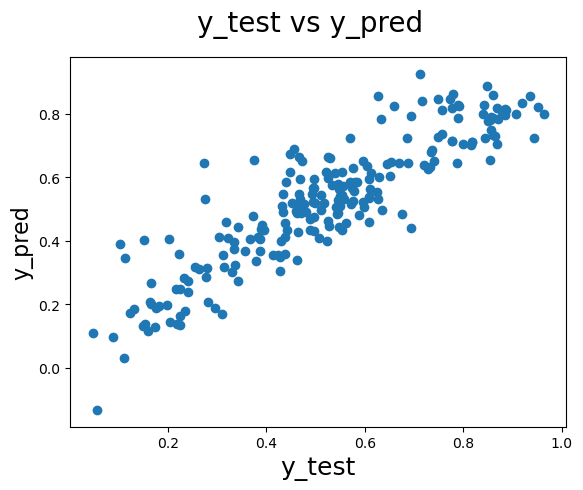

In [2027]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

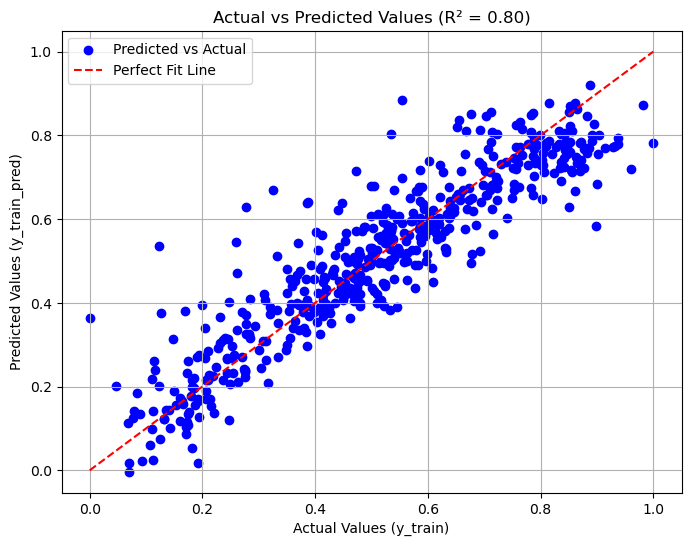

In [2029]:
# Scatter plot for Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label="Predicted vs Actual")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='dashed', label="Perfect Fit Line")

# Labels and title
plt.xlabel("Actual Values (y_train)")
plt.ylabel("Predicted Values (y_train_pred)")
plt.title(f"Actual vs Predicted Values (R² = {r2:.2f})")
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [2031]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7864


# Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.835
    - Test dataset R^2           : 0.7961
    - Train dataset Adjusted R^2 : 0.832  
    - Test dataset Adjusted R^2  : 0.7864